# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [83]:
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import core.plotting.visual_stationarity_test as cpvistte
import core.plotting.misc_plotting as cpmiscplt

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

# Configure Logger

In [82]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-421478e2-0b3d-4378-8df6-5caaa4f84754.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy'
  hash='e7ffae1b4'
  # Last commits:
    * e7ffae1b4 Dylan Celli SorrTask399_convert_design_philosophy_gdoc_to_markdown (#407)     (    5 days ago) Wed Jul 12 14:25:56 2023  (HEAD -> SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy, origin/SorrTask_413_unit_test_plot_projection_from_coreplottingmisc_plottingpy)
    * c161850b3 GP 

# Plots

## `plot_histograms_and_lagged_scatterplot()`

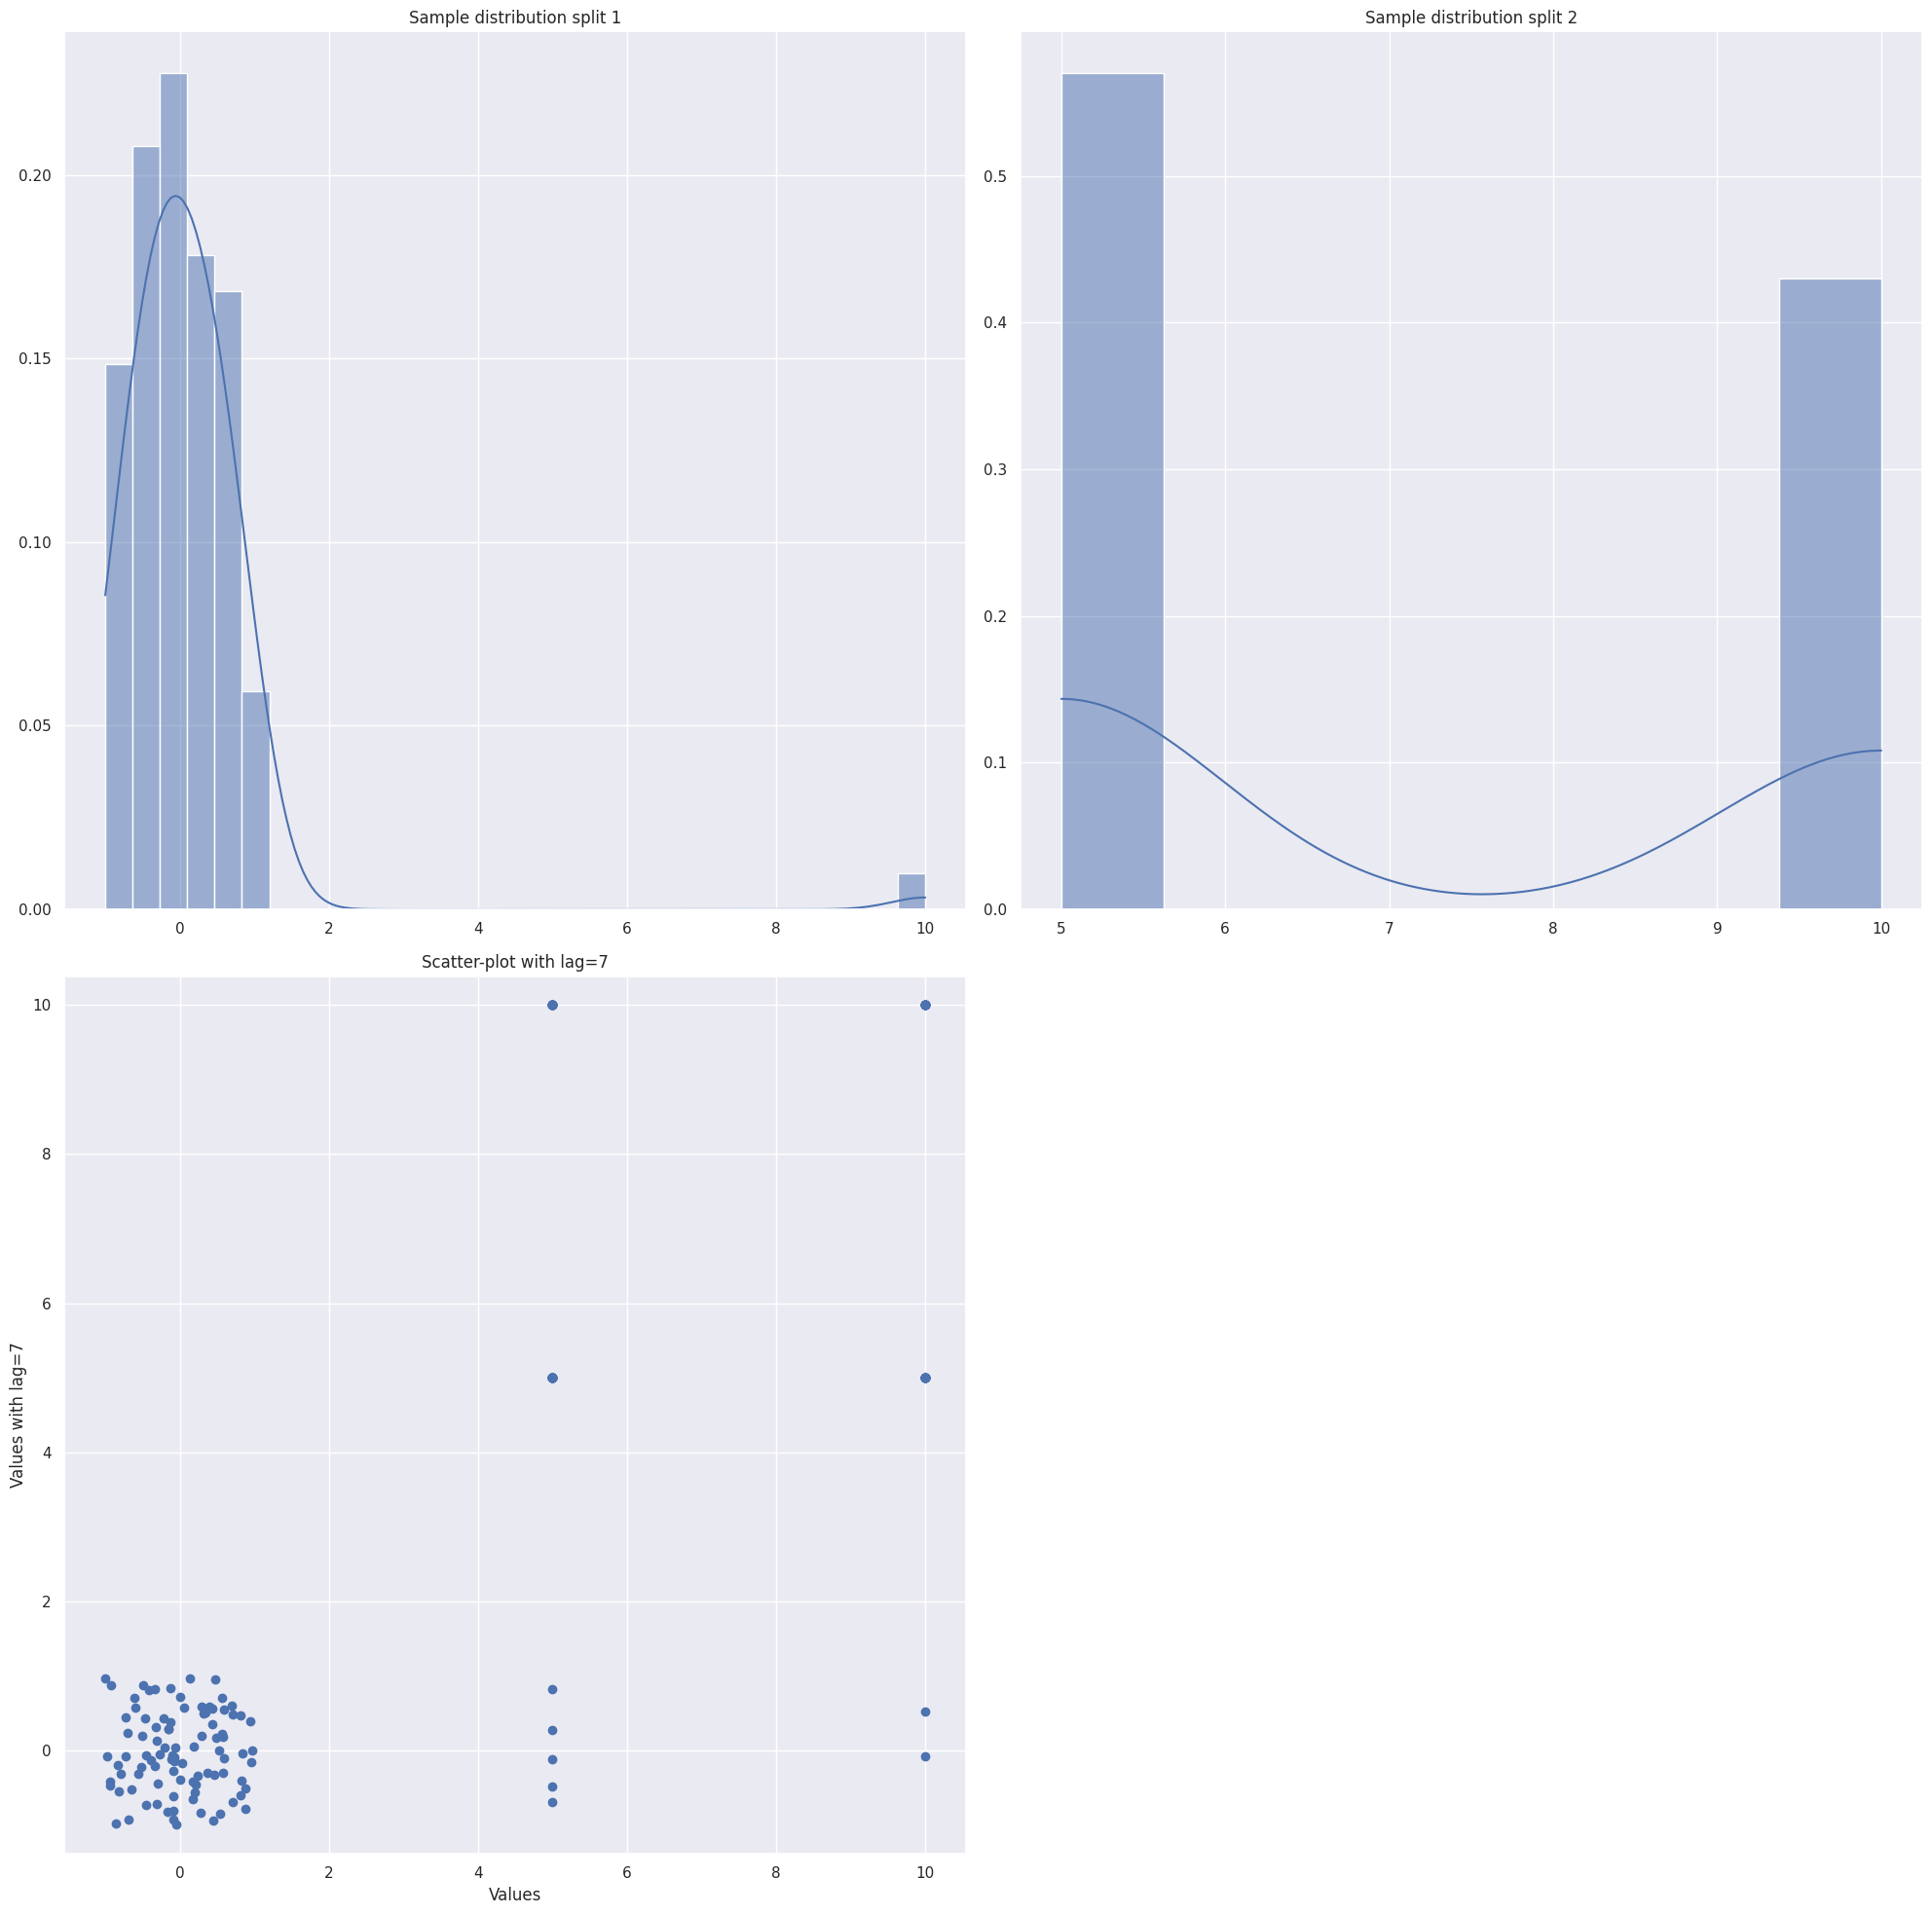

In [4]:
# Set inputs.
seq = np.concatenate([np.random.uniform(-1, 1, 100), np.random.choice([5, 10], 100)])
index = pd.date_range(start="2023-01-01", periods=len(seq), freq="D")
srs = pd.Series(seq, index=index)
lag = 7
# TODO(Dan): Remove after integration with `cmamp`
figsize = (20,20)
# Plot.
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_projection()`

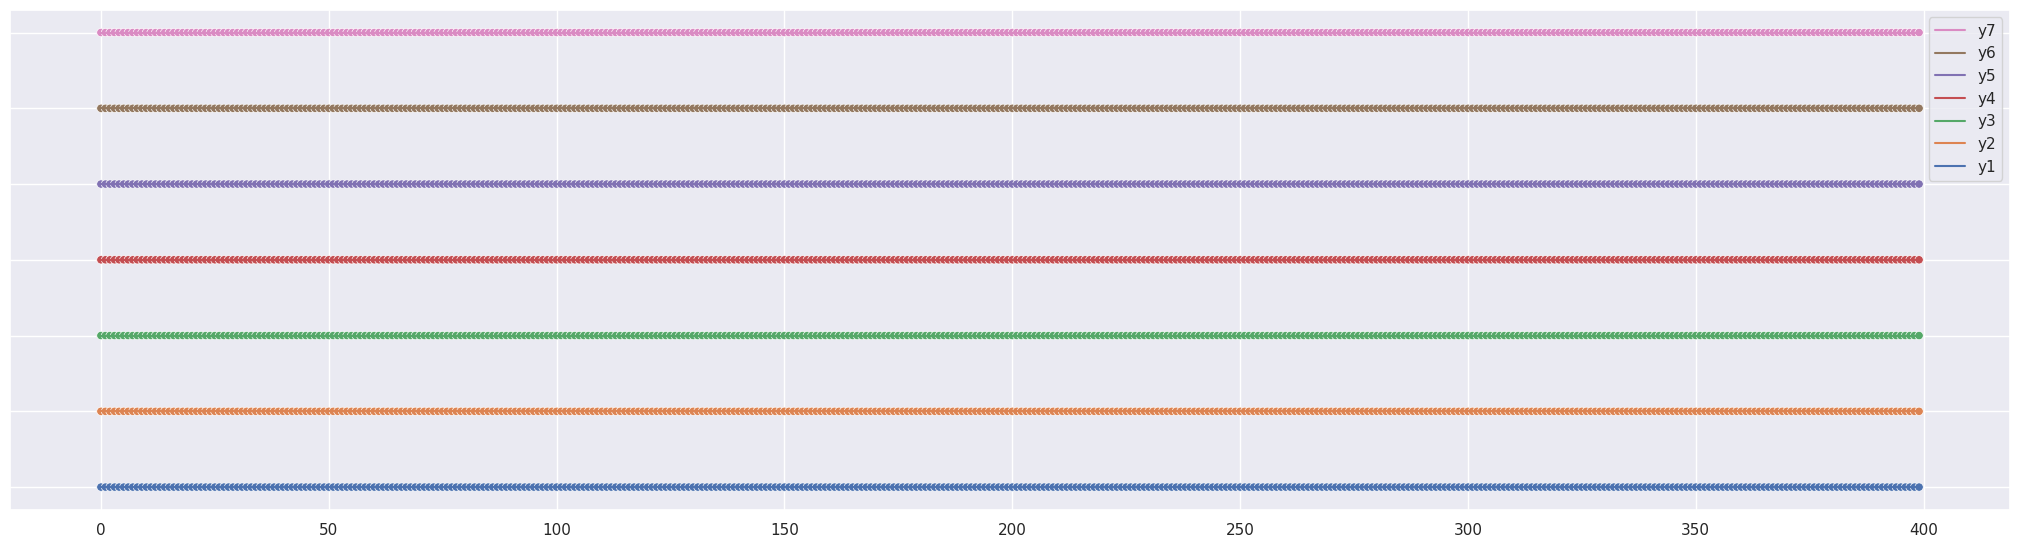

In [88]:
rand_df = pd.DataFrame(np.random.randint(0,100,size=(400, 7)), columns=['y1','y2','y3','y4','y5','y6','y7'])
#fig, ax = plt.subplots()
#ax.plot(range(0, 100), range(0, 100))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cpmiscplt.plot_projection(rand_df, special_values = [1000], mode = "scatter", ax = ax)

In [89]:

rand_df.head(50)

,y1,y2,y3,y4,y5,y6,y7
0,32,45,72,22,66,73,81
1,64,26,66,73,72,36,27
2,48,8,18,97,79,99,58
3,6,31,92,54,15,15,82
4,26,29,6,12,56,31,95
5,98,99,64,65,77,57,2
6,38,88,85,43,1,82,37
7,65,9,40,6,96,41,99
8,5,94,67,56,58,8,4
9,26,76,58,75,88,8,81
